<a href="https://colab.research.google.com/github/boadi9/Data_Prophet/blob/main/ALL4_Predicted_PTO_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Machine learning model Using Random Forest Regression : Predict ALL4 PTO Usage for 2025 Based on Historical Usage Trends

**Workflow of the Machine Learning Project**

1. Import libraries and Load PTO Dataset
2. Data Preprocessing
3. Data Analysis
4. Train Test Split
5. Pick your Machine learning Algorithm Eg. Random Forest Regression Model
6. Evaluation of the Model











### **Install Required Libraries and Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load the dataset into a DataFrame
pto_data = pd.read_csv("/content/Accrued_time_.csv")
pto_data.head()

,#,BU,Employee,detail_Code,detail_HoursPerYear,detail_StartBal,detail_CurYrEarn,detail_CurYrTaken,detail_CurBal,Year
0,2,CORP,Kevin Hickey,FHOL,16.0,NaN,8.0,8.0,NaN,2020
1,2,CORP,Kevin Hickey,PTO,200.0,40.0,200.0,100.0,140.0,2020
2,3,CORP,William Straub,FHOL,16.0,NaN,8.0,4.0,4.0,2020
3,3,CORP,William Straub,PTO,200.0,40.0,200.0,120.0,120.0,2020
4,5,PHL,John Egan,FHOL,NaN,NaN,NaN,NaN,NaN,2020


### **Data Preprocessing**

In [3]:
# Step 1: Handle missing values by filling numeric columns with 0
pto_data.fillna(0, inplace=True)

# Step 2: Ensure the Year column is in integer format
pto_data['Year'] = pto_data['Year'].astype(int)

# Step 3: Verify data preprocessing
data_summary_new = pto_data.describe(include='all')

# Display Data Summary using Pandas
print("PTO Data Summary (2020-2023)")
from IPython.display import display  # For a clean display in Colab
display(data_summary_new)



PTO Data Summary (2020-2023)


,#,BU,Employee,detail_Code,detail_HoursPerYear,detail_StartBal,detail_CurYrEarn,detail_CurYrTaken,detail_CurBal,Year
count,1772.000000,1772,1772,1772,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000
unique,NaN,16,281,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,CORP,Luis Sanchez,PTO,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,405,16,835,NaN,NaN,NaN,NaN,NaN,NaN
mean,196.273138,NaN,NaN,NaN,84.491986,11.984904,75.654989,56.688403,30.951490,2022.643905
std,118.055117,NaN,NaN,NaN,80.552847,23.351009,78.013612,64.882600,46.586908,1.300285
min,2.000000,NaN,NaN,NaN,0.000000,-40.000000,-80.000000,-2.000000,-2.000000,2020.000000
25%,94.000000,NaN,NaN,NaN,16.000000,0.000000,16.000000,8.000000,0.000000,2022.000000
50%,193.000000,NaN,NaN,NaN,24.000000,0.000000,21.800000,16.000000,8.000000,2023.000000
75%,279.000000,NaN,NaN,NaN,168.000000,18.000000,150.837500,111.125000,44.000000,2024.000000


### **Exploratory Data Analysis (EDA)**
Visualize correlations to identify relevant features.

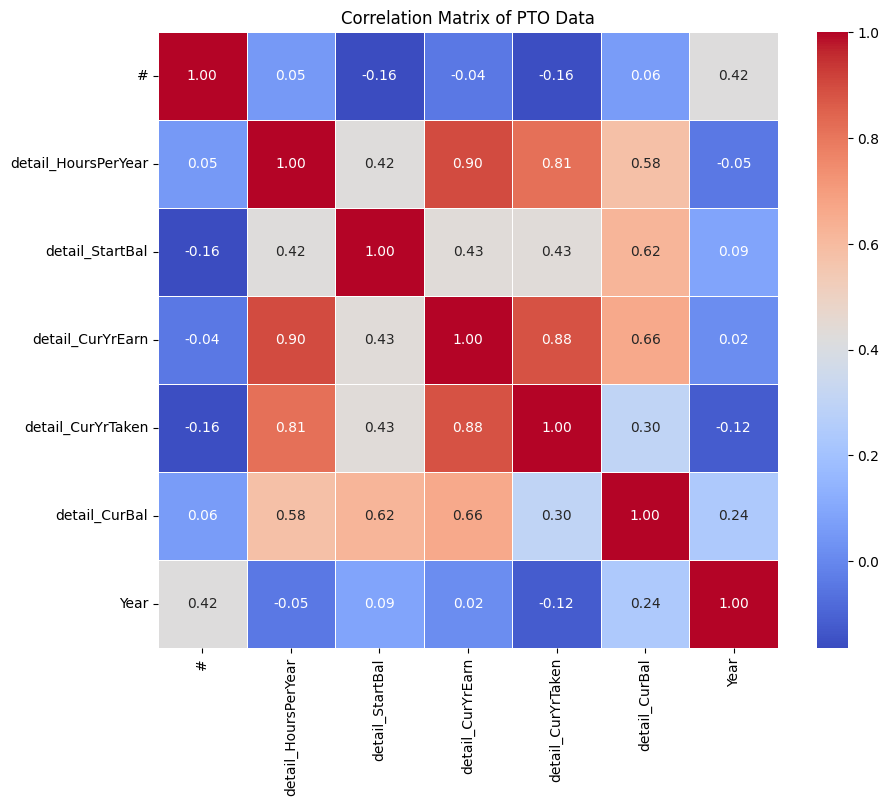

,detail_CurYrTaken
detail_CurYrTaken,1.000000
detail_CurYrEarn,0.882231
detail_HoursPerYear,0.814351
detail_StartBal,0.434515
detail_CurBal,0.302442
Year,-0.119037
#,-0.155968


In [4]:
# Filter out non-numeric columns before computing the correlation matrix
numeric_data = pto_data.select_dtypes(include=['float64', 'int64'])

# Compute and plot the correlation matrix for only numeric data
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of PTO Data')
plt.show()

# Display correlations with 'detail_CurYrTaken' (PTO taken)
correlation_matrix['detail_CurYrTaken'].sort_values(ascending=False)

##  **Random Forest Regression Model**
### **Train-Test Split**

* Feature Selection and Train-Test Split:
* Use 2020–2023 data to train the model.
* Model Training: Train with Random Forest to predict PTO usage.
* Prediction and Validation: Use this trained model to generate predictions for 2024 and 2025.





###  **Results**

######The Random Forest Regressor has been trained using the updated dataset, and here are the performance metrics on the test set (2020–2023 data):


*  Mean Squared Error (MSE): 434.32
*  Mean Absolute Error (MAE): 12.74
*  R² Score: 0.91


###### The model explains 91.2% of the variance in the PTO usage, which is a good result, but there might be some room for improvement.



In [5]:
# Step 1: Select relevant features and target for the model
features_new = ['detail_HoursPerYear', 'detail_StartBal', 'detail_CurYrEarn']
target_new = 'detail_CurYrTaken'

# Step 2: Prepare the data for train-test split (2020-2023 data)
train_data_new = pto_data[pto_data['Year'] < 2024]

X_new = train_data_new[features_new]
y_new = train_data_new[target_new]

# Step 3: Perform train-test split (80% train, 20% test)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Regressor on the new dataset
rf_model_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

# Step 5: Make predictions on the test set
y_pred_test_new = rf_model_new.predict(X_test_new)

# Step 6: Evaluate the model on the test set
mse_test_new = mean_squared_error(y_test_new, y_pred_test_new)
mae_test_new = mean_absolute_error(y_test_new, y_pred_test_new)
r2_test_new = r2_score(y_test_new, y_pred_test_new)

# Display the model performance metrics
mse_test_new, mae_test_new, r2_test_new

print(f"Random Forest - MSE: {mse_test_new}, MAE: {mae_test_new}, R2: {r2_test_new}")


Random Forest - MSE: 434.3162461768641, MAE: 12.740035664148639, R2: 0.9145279474774188


####  **Model Validation Using Year = 2023 data** as a proxy for **validation** to evaluate the models generalization

*   Validation using 2023 data
*   Generate predictions for 2024 based on the models perfromance



##### **Validation Results (2023 Data)**
*   Mean Squared Error (MSE): 309.32
*   Mean Absolute Error (MAE): 9.41
*   R² Score: 0.927


The **model explains 92.8% of the variance in PTO usage for 2023, showing that it generalizes well.**


In [6]:
# Step 1: Extract the 2023 data for validation
validation_data_2023 = pto_data[pto_data['Year'] == 2023]

# Step 2: Prepare the validation set using 2023 data
X_val_2023 = validation_data_2023[features_new]
y_val_2023 = validation_data_2023[target_new]

# Step 3: Predict PTO usage for 2023 using the trained Random Forest model
y_pred_val_2023 = rf_model_new.predict(X_val_2023)

# Step 4: Evaluate the model's performance on the 2023 validation data
mse_val_2023 = mean_squared_error(y_val_2023, y_pred_val_2023)
mae_val_2023 = mean_absolute_error(y_val_2023, y_pred_val_2023)
r2_val_2023 = r2_score(y_val_2023, y_pred_val_2023)

# Step 5: Use the trained model to predict PTO usage for 2024 (simulated as new data)
X_2024_simulated = X_val_2023  # Assuming similar feature structure for 2024
y_pred_2024 = rf_model_new.predict(X_2024_simulated)

# Display the 2023 validation results and the 2024 predictions
(mse_val_2023, mae_val_2023, r2_val_2023), y_pred_2024


((309.30164372235924, 9.406470489836856, 0.927891566319809),
 array([1.44043352e+01, 3.89468595e-02, 1.69347804e+02, 1.44043352e+01,
        3.89468595e-02, 1.69347804e+02, 3.89468595e-02, 3.89468595e-02,
        1.44043352e+01, 1.94561667e+02, 1.44043352e+01, 3.89468595e-02,
        1.89938929e+02, 1.44043352e+01, 7.87125000e+01, 1.74065107e+02,
        1.44043352e+01, 3.89468595e-02, 1.69347804e+02, 1.44043352e+01,
        3.82275000e+01, 1.62592619e+02, 1.44043352e+01, 3.89468595e-02,
        1.69347804e+02, 1.44043352e+01, 3.89468595e-02, 1.69347804e+02,
        1.44043352e+01, 3.89468595e-02, 1.69347804e+02, 1.44043352e+01,
        3.89468595e-02, 1.69347804e+02, 1.44043352e+01, 3.89468595e-02,
        1.69347804e+02, 1.19175000e+01, 7.87125000e+01, 8.41891667e+01,
        6.02000000e+00, 5.15550000e+01, 1.44043352e+01, 1.88585000e+02,
        1.44043352e+01, 2.56793983e+01, 1.74065107e+02, 1.44043352e+01,
        3.89468595e-02, 1.88453333e+02, 8.48975000e+01, 1.44043352e+01,
   

 ### Export the Prediction for **Predicted** **PTO Usage** **2024** Using Random Forest Model


In [8]:
# Step 1:  DataFrame to store the 2024 predictions
predicted_2024_df = validation_data_2023[['Employee', 'BU', 'detail_HoursPerYear']].copy()
predicted_2024_df['Predicted_PTO_2024'] = y_pred_2024

# Step 2: Save the predictions for 2024 to an Excel file
predictions_2024_path = "/content/predicted_pto_2024.xlsx"
predicted_2024_df.to_excel(predictions_2024_path, index=False)

# Step 3: Provide the download link for the predictions
predictions_2024_path


'/content/predicted_pto_2024.xlsx'

**Save the Trained Model : Random Forest Model to be Applied in the Future**

In [11]:
# Step 1: Save the trained Random Forest model for future use
!pip install joblib
import joblib
# Step 1: Save the trained Random Forest model for future use
model_save_path = "/content/random_forest_pto_model_v2.pkl"
joblib.dump(rf_model_new, model_save_path)

# Provide the download link for the saved model
model_save_path


'/content/random_forest_pto_model_v2.pkl'

### **Predicting 2025 PTO Usage** Using 2024 Data

Use 2024 data as input to forecast PTO usage for 2025.

**Load 2024 dataset !!!!!!!**

In [12]:
# Load the 2024 dataset
import pandas as pd

# Load the uploaded 2024 dataset
data_2024_path = "/content/2024_dataset.xlsx"
data_2024 = pd.read_excel(data_2024_path)

# Display the first few rows to ensure it loaded correctly
data_2024.head()


,#,BU,Employee,detail_Code,detail_HoursPerYear,detail_StartBal,detail_CurYrEarn,detail_CurYrTaken,detail_CurBal,Year
0,2,CORP,Kevin Hickey,FHOL,16.0,NaN,16.0,8.0,8.0,2024
1,2,CORP,Kevin Hickey,GPTO,NaN,NaN,NaN,NaN,NaN,2024
2,2,CORP,Kevin Hickey,PTO,200.0,80.0,200.0,86.0,194.0,2024
3,3,CORP,William Straub,FHOL,16.0,NaN,16.0,8.0,8.0,2024
4,3,CORP,William Straub,GPTO,NaN,NaN,NaN,NaN,NaN,2024


## **Load** the **saved** **Random** **Forest Regression** Model

##### Next Steps

*   Prepare 2024 data for predictions ( features only)
*   Use loaded model to predcit the PTO usage for 2025
*   Store the PTO 2025 Predictions
*   Export them to be downloaded



In [14]:
# Step 1: Load the previously saved Random Forest model
model_path = "/content/random_forest_pto_model_v2.pkl"
rf_model_loaded = joblib.load(model_path)

# Step 2: Prepare the 2024 data for prediction (features only)
X_2025 = data_2024[['detail_HoursPerYear', 'detail_StartBal', 'detail_CurYrEarn']].fillna(0)

# Step 3: Use the loaded model to predict PTO usage for 2025
y_pred_2025 = rf_model_loaded.predict(X_2025)

# Step 4: Create a DataFrame to store the 2025 predictions
predicted_2025_df = data_2024[['Employee', 'BU']].copy()
predicted_2025_df['Predicted_PTO_2025'] = y_pred_2025

# Step 5: Display the predictions to the user using native Pandas
from IPython.display import display  # For better output formatting in Colab

print("Predicted PTO Usage for 2025:")
display(predicted_2025_df)



Predicted PTO Usage for 2025:


,Employee,BU,Predicted_PTO_2025
0,Kevin Hickey,CORP,14.404335
1,Kevin Hickey,CORP,0.038947
2,Kevin Hickey,CORP,143.419889
3,William Straub,CORP,14.404335
4,William Straub,CORP,0.038947
...,...,...,...
604,Chris Hernandez,WAS,32.576476
605,Kelvin Lu,CAL,0.920667
606,Kelvin Lu,CAL,1.397500
607,Chloe Becker,WAS,27.682083


### Export the **Predicted 2025 PTO Usage**

In [15]:
# Step 1: Save the 2025 predictions to an Excel file
predictions_2025_path = "/content/predicted_pto_2025.xlsx"
predicted_2025_df.to_excel(predictions_2025_path, index=False)

# Step 2: Provide the download link for the saved predictions
predictions_2025_path


'/content/predicted_pto_2025.xlsx'